<a href="https://colab.research.google.com/github/M-o-ha-med/UTSPrakPM/blob/main/1227050074_Mohamed_PraktikumPembelajaranMesin_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import kagglehub
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix , f1_score, classification_report
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
path = kagglehub.dataset_download('joshmcadams/oranges-vs-grapefruit')

print(path)

100%|██████████| 61.2k/61.2k [00:00<00:00, 17.0MB/s]

Extracting files...
/root/.cache/kagglehub/datasets/joshmcadams/oranges-vs-grapefruit/versions/2


In [11]:
os.listdir(path)

['citrus.csv']

In [13]:
data = pd.read_csv(f'{path}/citrus.csv')
data.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [14]:
data.isna().sum()

,0
name,0
diameter,0
weight,0
red,0
green,0
blue,0


In [15]:
data.duplicated().sum()

np.int64(0)

In [16]:
data.describe()

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


In [51]:
data['name'].value_counts()

,count
name,
orange,5000
grapefruit,5000


In [17]:
train_data = data.drop('name' , axis=1)
test_data = data['name']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(train_data , test_data , test_size=0.3 , stratify=data['name'])

In [44]:
gnb  = GaussianNB()

y_pred = gnb.fit(X_train , y_train).predict(X_test)

In [45]:
print(accuracy_score(y_test , y_pred))
print(f1_score(y_test , y_pred , average='weighted'))

0.9256666666666666
0.9256630241548502


In [46]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

  grapefruit       0.93      0.92      0.93      1500
      orange       0.92      0.93      0.93      1500

    accuracy                           0.93      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.93      0.93      0.93      3000



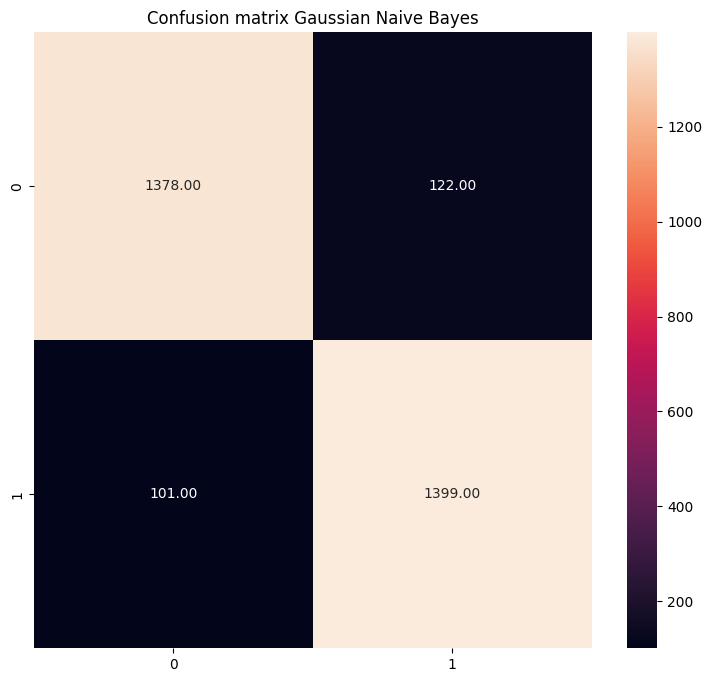

In [47]:
plt.figure(figsize=(9,8))
plt.title('Confusion matrix Gaussian Naive Bayes')
sns.heatmap(confusion_matrix(y_test , y_pred) , annot=True, fmt='.2f')
plt.show()

In [48]:
data_to_predict = [[7.48 ,	105.76	,152,	79	,3]]
prediction = gnb.predict(data_to_predict)
probs = gnb.predict_proba(data_to_predict)

print(f'Prediction    : {prediction[0]}')
print(f'Probability   : {probs[0]}')

Prediction    : orange
Probability   : [3.69959166e-07 9.99999630e-01]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [54]:
data_to_predict = [[7.64 ,	126.79 ,	150 ,	74 ,	50]]
prediction = gnb.predict(data_to_predict)
probs = gnb.predict_proba(data_to_predict)

print(f'Prediction    : {prediction[0]}')
print(f'Probability   : {probs[0]}')

Prediction    : grapefruit
Probability   : [0.99202956 0.00797044]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
